In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import pathlib
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
pre_trained_model = MobileNetV2(include_top=False, pooling='avg')

In [3]:
pre_trained_model.trainable = False

In [4]:
train_data_location = 'C:/Users/danie/Documents/FTDS/Capstone/3. Model/Data/Train'
train_data = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(train_data_location, target_size=(224,224))

Found 5528 images belonging to 12 classes.


In [5]:
validation_data_location = 'C:/Users/danie/Documents/FTDS/Capstone/3. Model/Data/Test'
validation_data = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(validation_data_location, target_size=(224,224))

Found 1303 images belonging to 12 classes.


In [6]:
class_mappings = train_data.class_indices
print(class_mappings)

{'Blouses': 0, 'Dresses': 1, 'Jackets & Coats': 2, 'Jeans': 3, 'Jumpers': 4, 'Polos': 5, 'Shirts': 6, 'Shorts': 7, 'Skirts': 8, 'Suits': 9, 'T-Shirts': 10, 'Trousers': 11}


In [9]:
model = Sequential()
model.add(pre_trained_model)
model.add(Dense(len(class_mappings), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(class_mappings), activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])#add more metrics if req

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 12)                15372     
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
Total params: 2,273,512
Trainable params: 15,528
Non-trainable params: 2,257,984
_________________________________________________________________


In [12]:
training_history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
173/173 [==============================] - 638s 4s/step - loss: 1.8705 - accuracy: 0.3730 - val_loss: 1.4813 - val_accuracy: 0.5495
Epoch 2/20
173/173 [==============================] - 571s 3s/step - loss: 1.5028 - accuracy: 0.4937 - val_loss: 1.2576 - val_accuracy: 0.6239
Epoch 3/20
173/173 [==============================] - 576s 3s/step - loss: 1.3367 - accuracy: 0.5445 - val_loss: 1.1382 - val_accuracy: 0.6393
Epoch 4/20
173/173 [==============================] - 605s 3s/step - loss: 1.2460 - accuracy: 0.5725 - val_loss: 1.0924 - val_accuracy: 0.6347
Epoch 5/20
173/173 [==============================] - 528s 3s/step - loss: 1.1722 - accuracy: 0.5917 - val_loss: 1.0442 - val_accuracy: 0.6738
Epoch 6/20
173/173 [==============================] - 518s 3s/step - loss: 1.1495 - accuracy: 0.5932 - val_loss: 1.0218 - val_accuracy: 0.6616
Epoch 7/20
173/173 [==============================] - 491s 3s/step - loss: 1.1040 - accuracy: 0.6080 - val_loss: 0.9799 - val_accuracy: 0.6838

In [13]:
# Save Model
fer_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("model2.h5")

In [14]:
def plot_training_accuracy(training_history):
    plt.plot(training_history.history['accuracy'], label = 'training accuracy')
    plt.plot(training_history.history['val_accuracy'], label = 'validation accuracy')
    plt.legend
    plt.xlabel('epoch')
    plt.ylabel('accuracy')

def plot_training_loss(training_history):
    plt.plot(training_history.history['loss'], label = 'training loss')
    plt.plot(training_history.history['val_loss'], label = 'validation loss')
    plt.legend
    plt.xlabel('epoch')
    plt.ylabel('loss')

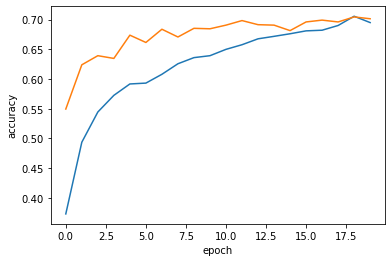

In [15]:
plot_training_accuracy(training_history)

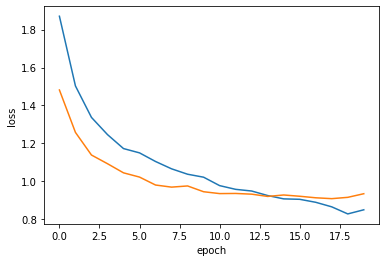

In [16]:
plot_training_loss(training_history)

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from keras.models import model_from_json

In [21]:
train_data.class_indices

{'Blouses': 0,
 'Dresses': 1,
 'Jackets & Coats': 2,
 'Jeans': 3,
 'Jumpers': 4,
 'Polos': 5,
 'Shirts': 6,
 'Shorts': 7,
 'Skirts': 8,
 'Suits': 9,
 'T-Shirts': 10,
 'Trousers': 11}

In [38]:
# Load Model
alessandra = model_from_json(open("model.json", "r").read()) 
alessandra.load_weights('model.h5')

In [43]:
sartorial = image.load_img("./Data/Dress1.jpg", target_size=(224, 224))
sartorial = image.img_to_array(sartorial)
sartorial =np.expand_dims(sartorial ,axis=0)
imgplot = plt.imshow(sartorial)
print(sartorial.shape)

TypeError: Invalid shape (1, 224, 224, 3) for image data

In [ ]:
sartorial = pre_process_input(sartorial)

In [ ]:
predictions = model.predict(sartorial)
predicted_class = np.argmax(predictions)
print(predicted_class)

In [ ]:
#from imagenet class predictor
print("Top predictions for this image:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(f"Prediction: {name} - {likelihood:2f}")